# 課題1：住宅価格のデータの前処理

ここではデータの前処理について理解いただくための課題を用意しました。

ここでは住宅価格のデータセットを利用します。今回の住宅価格のデータは、Colabのランタイムに標準でインストールされている「カリフォルニア州の住宅価格」ではなく、以下のページで配布されている「アイオワ州の住宅価格」のデータを利用します。

このデータは、Dean De Cockという統計学者の論文が出典元とされていて、以下のサイトでCSVファイルの配布と各列の説明がされています。

[Housing prices in Ames, Iowa](https://www.openintro.org/data/index.php?data=ames)

各セルに入っているコメントの下に、実行するコードを記入してください。また、作業内容の一部にPandasの公式ドキュメントへのリンクを追記していますので、わからない部分がありましたら参照してください。

**注意点：**

- 列名にドット（`.`）が入っているとPandasの処理中にエラーが発生するため、元データの列名から `.` を削除しています
- PID列のみ、元データから削除しています

## 1. 必要なライブラリの読み込み

In [1]:
# 必要なライブラリの読み込み（変更しないでください）
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2. データの読み込み

CSVファイル *iowa_ames_housing_price.csv* を読み込み、内容を確認します。

In [2]:
# データを変数datasetに読み込む
dataset = pd.read_csv("iowa_ames_housing_price.csv")

In [3]:
# データの最初の5行を表示
dataset.head()

Order  area   price  MSSubClass MSZoning  LotFrontage  LotArea Street  \
0      1  1710  208500          60       RL         65.0     8450   Pave   
1      2  1262  181500          20       RL         80.0     9600   Pave   
2      3  1786  223500          60       RL         68.0    11250   Pave   
3      4  1717  140000          70       RL         60.0     9550   Pave   
4      5  2198  250000          60       RL         84.0    14260   Pave   

  Alley LotShape  ... ScreenPorch PoolArea PoolQC Fence MiscFeature MiscVal  \
0   NaN      Reg  ...           0        0    NaN   NaN         NaN       0   
1   NaN      Reg  ...           0        0    NaN   NaN         NaN       0   
2   NaN      IR1  ...           0        0    NaN   NaN         NaN       0   
3   NaN      IR1  ...           0        0    NaN   NaN         NaN       0   
4   NaN      IR1  ...           0        0    NaN   NaN         NaN       0   

  MoSold YrSold SaleType  SaleCondition  
0      2   2008       WD         Normal  
1      5   2007       WD         Normal  
2      9   2008       WD         Normal  
3      2   2006       WD        Abnorml  
4     12   2008       WD         Normal  

[5 rows x 81 columns]

全データの行数と列数を取得します。DataFrameの`shape` プロパティを参照します。

参照：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html

In [4]:
# データの行数、列数を表示
dataset.shape


(1460, 81)

## 3. 要約統計量を出力する

データ数、平均や中央値、標準偏差などの統計量を確認することで、データへの理解を深めます。

DataFrameの `describe()` を使うことで、様々な統計量の情報を要約として表示されます。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [5]:
# 要約統計量を表示
dataset.describe()

Order         area          price   MSSubClass  LotFrontage  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1201.000000   
mean    730.500000  1515.463699  180921.195890    56.897260    70.049958   
std     421.610009   525.480383   79442.502883    42.300571    24.284752   
min       1.000000   334.000000   34900.000000    20.000000    21.000000   
25%     365.750000  1129.500000  129975.000000    20.000000    59.000000   
50%     730.500000  1464.000000  163000.000000    50.000000    69.000000   
75%    1095.250000  1776.750000  214000.000000    70.000000    80.000000   
max    1460.000000  5642.000000  755000.000000   190.000000   313.000000   

             LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    10516.828082     6.099315     5.575342  1971.267808   1984.865753   
std      9981.264932     1.382997     1.112799    30.202904     20.645407   
min      1300.000000     1.000000     1.000000  1872.000000   1950.000000   
25%      7553.500000     5.000000     5.000000  1954.000000   1967.000000   
50%      9478.500000     6.000000     5.000000  1973.000000   1994.000000   
75%     11601.500000     7.000000     6.000000  2000.000000   2004.000000   
max    215245.000000    10.000000     9.000000  2010.000000   2010.000000   

       ...   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch   X3SsnPorch  \
count  ...  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean   ...   472.980137    94.244521    46.660274      21.954110     3.409589   
std    ...   213.804841   125.338794    66.256028      61.119149    29.317331   
min    ...     0.000000     0.000000     0.000000       0.000000     0.000000   
25%    ...   334.500000     0.000000     0.000000       0.000000     0.000000   
50%    ...   480.000000     0.000000    25.000000       0.000000     0.000000   
75%    ...   576.000000   168.000000    68.000000       0.000000     0.000000   
max    ...  1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  
mean     15.060959     2.758904     43.489041     6.321918  2007.815753  
std      55.757415    40.177307    496.123024     2.703626     1.328095  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     5.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     480.000000   738.000000  15500.000000    12.000000  2010.000000  

[8 rows x 38 columns]

## 4. 基本的なデータの操作

データの抽出・列の分割について学びます。

### インデックスを用いた行の指定

In [6]:
# インデックス番号0から10行分抽出
dataset.iloc[0:10]

Order  area   price  MSSubClass MSZoning  LotFrontage  LotArea Street  \
0      1  1710  208500          60       RL         65.0     8450   Pave   
1      2  1262  181500          20       RL         80.0     9600   Pave   
2      3  1786  223500          60       RL         68.0    11250   Pave   
3      4  1717  140000          70       RL         60.0     9550   Pave   
4      5  2198  250000          60       RL         84.0    14260   Pave   
5      6  1362  143000          50       RL         85.0    14115   Pave   
6      7  1694  307000          20       RL         75.0    10084   Pave   
7      8  2090  200000          60       RL          NaN    10382   Pave   
8      9  1774  129900          50       RM         51.0     6120   Pave   
9     10  1077  118000         190       RL         50.0     7420   Pave   

  Alley LotShape  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature MiscVal  \
0   NaN      Reg  ...           0        0    NaN    NaN         NaN       0   
1   NaN      Reg  ...           0        0    NaN    NaN         NaN       0   
2   NaN      IR1  ...           0        0    NaN    NaN         NaN       0   
3   NaN      IR1  ...           0        0    NaN    NaN         NaN       0   
4   NaN      IR1  ...           0        0    NaN    NaN         NaN       0   
5   NaN      IR1  ...           0        0    NaN  MnPrv        Shed     700   
6   NaN      Reg  ...           0        0    NaN    NaN         NaN       0   
7   NaN      IR1  ...           0        0    NaN    NaN        Shed     350   
8   NaN      Reg  ...           0        0    NaN    NaN         NaN       0   
9   NaN      Reg  ...           0        0    NaN    NaN         NaN       0   

  MoSold YrSold SaleType  SaleCondition  
0      2   2008       WD         Normal  
1      5   2007       WD         Normal  
2      9   2008       WD         Normal  
3      2   2006       WD        Abnorml  
4     12   2008       WD         Normal  
5     10   2009       WD         Normal  
6      8   2007       WD         Normal  
7     11   2009       WD         Normal  
8      4   2008       WD        Abnorml  
9      1   2008       WD         Normal  

[10 rows x 81 columns]

In [7]:
# 最初の10行だけ抽出し、「price」と「LotArea」の列を表示
dataset.iloc[0:10][['price', 'LotArea']]

price  LotArea
0  208500     8450
1  181500     9600
2  223500    11250
3  140000     9550
4  250000    14260
5  143000    14115
6  307000    10084
7  200000    10382
8  129900     6120
9  118000     7420

### カラム間の演算

PandasのDataFrameでは、列同士の四則演算、ならびに新しい列の追加ができます。

たとえば、`df` というDataFrameの変数があり、中に `a`,`b` というカラムが存在するとき、`df['c'] = df['a'] + df['b']` と記述することで、`a`列と`b`列の加算結果を `c` という新しい列として `df` に追加してくれます。

In [10]:
# 「X1stFlrSF」と「X2ndFlrSF」を合計した「XFlrSF_total」を新たな列としてdatasetに加える
dataset['XFlrSF_total'] = dataset['X1stFlrSF'] + dataset['X2ndFlrSF']
dataset['XFlrSF_total'].head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: XFlrSF_total, dtype: int64

In [11]:
# datasetからloc関数を使用して「X1stFlrSF」と「X2ndFlrSF」、「XFlrSF_total」を先頭から5行分表示し、正しく追加されていることを確認する
dataset.loc[0:4, ['X1stFlrSF', 'X2ndFlrSF', 'XFlrSF_total']]

X1stFlrSF  X2ndFlrSF  XFlrSF_total
0        856        854          1710
1       1262          0          1262
2        920        866          1786
3        961        756          1717
4       1145       1053          2198

 ### ダミー変数の作成

列 `SaleType` は `WD`, `New`, `COD` などで構成されたカテゴリーデータです。 `get_dummies()` 関数を使用してダミー変数に変換しましょう。

参考：https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [14]:
# 列'SaleType'をダミー変数に展開したものを変数 dataset に上書きします
dataset = pd.get_dummies(dataset, columns=['SaleType'])

In [55]:
# ダミー変数が作成されていることを確認します　(datasetの最初の5行だけ出力)
dataset.iloc[0:5]

Order  area   price  MSSubClass MSZoning  LotFrontage  LotArea Street  \
0      1  1710  208500          60       RL         65.0     8450   Pave   
1      2  1262  181500          20       RL         80.0     9600   Pave   
2      3  1786  223500          60       RL         68.0    11250   Pave   
3      4  1717  140000          70       RL         60.0     9550   Pave   
4      5  2198  250000          60       RL         84.0    14260   Pave   

  Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4   NaN      IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0       Norm       Norm     1Fam     2Story            7            5   
1      Feedr       Norm     1Fam     1Story            6            8   
2       Norm       Norm     1Fam     2Story            7            5   
3       Norm       Norm     1Fam     2Story            7            5   
4       Norm       Norm     1Fam     2Story            8            5   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1        NaN         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3        NaN         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  X1stFlrSF  X2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr        856        854   
1         1262    GasA        Ex          Y      SBrkr       1262          0   
2          920    GasA        Ex          Y      SBrkr        920        866   
3          756    GasA        Gd          Y      SBrkr        961        756   
4         1145    GasA        Ex          Y      SBrkr       1145       1053   

   LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0             0             1             0         2         1             3   
1             0             0             1         2         0             3   
2             0             1             0         2         1             3   
3             0             1             0         1         0             3   
4             0             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1       

### フィルタリング

DataFrameの `query()` を使いフィルタリングを行ないましょう。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

In [21]:
# 'YearBuilt'が2000以降の物件のみを抽出し、最初の5件のみ表示
dataset.query("YearBuilt >= 2000").head()

Order  area   price  MSSubClass MSZoning  LotFrontage  LotArea Street  \
0       1  1710  208500          60       RL         65.0     8450   Pave   
2       3  1786  223500          60       RL         68.0    11250   Pave   
4       5  2198  250000          60       RL         84.0    14260   Pave   
6       7  1694  307000          20       RL         75.0    10084   Pave   
11     12  2324  345000          60       RL         85.0    11924   Pave   

   Alley LotShape  ... XFlrSF_total SaleType_COD SaleType_CWD SaleType_Con  \
0    NaN      Reg  ...         1710        False        False        False   
2    NaN      IR1  ...         1786        False        False        False   
4    NaN      IR1  ...         2198        False        False        False   
6    NaN      Reg  ...         1694        False        False        False   
11   NaN      IR1  ...         2324        False        False        False   

   SaleType_ConLD SaleType_ConLI SaleType_ConLw SaleType_New SaleType_Oth  \
0           False          False          False        False        False   
2           False          False          False        False        False   
4           False          False          False        False        False   
6           False          False          False        False        False   
11          False          False          False         True        False   

    SaleType_WD  
0          True  
2          True  
4          True  
6          True  
11        False  

[5 rows x 90 columns]

`'LotArea >= 15000 and MSSubClass >= 50'` のように複数の条件を指定できます。

In [20]:
# 'YearBuilt'が2000以降、'GarageCars'が3以上の物件を抽出し、最初の5件のみ表示
dataset.query("YearBuilt >= 2000 and GarageCars >= 3").head()

Order  area   price  MSSubClass MSZoning  LotFrontage  LotArea Street  \
4       5  2198  250000          60       RL         84.0    14260   Pave   
11     12  2324  345000          60       RL         85.0    11924   Pave   
13     14  1494  279500          20       RL         91.0    10652   Pave   
20     21  2376  325300          60       RL        101.0    14215   Pave   
25     26  1600  256300          20       RL        110.0    14230   Pave   

   Alley LotShape  ... XFlrSF_total SaleType_COD SaleType_CWD SaleType_Con  \
4    NaN      IR1  ...         2198        False        False        False   
11   NaN      IR1  ...         2324        False        False        False   
13   NaN      IR1  ...         1494        False        False        False   
20   NaN      IR1  ...         2376        False        False        False   
25   NaN      Reg  ...         1600        False        False        False   

   SaleType_ConLD SaleType_ConLI SaleType_ConLw SaleType_New SaleType_Oth  \
4           False          False          False        False        False   
11          False          False          False         True        False   
13          False          False          False         True        False   
20          False          False          False         True        False   
25          False          False          False        False        False   

    SaleType_WD  
4          True  
11        False  
13        False  
20        False  
25         True  

[5 rows x 90 columns]

## 5. データの可視化

データを理解するには要約統計量や抽出したデータを確認するだけでは不充分であり、可視化が必要です。

### ヒストグラム

連続変数の分布を確認する際に有効です。DataFrameの `hist()` が使えます。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

<Axes: >

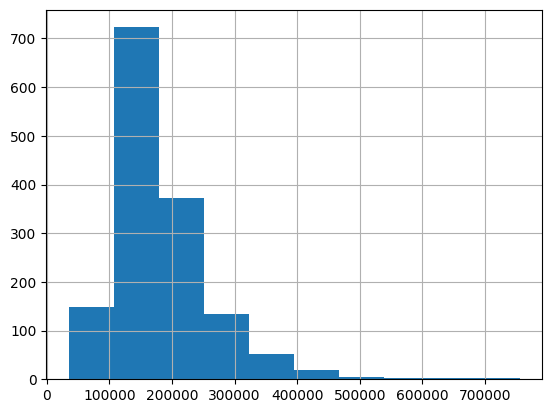

In [22]:
# datasetの'price'をヒストグラムで表示（DataFrameのhist()を利用する）
dataset['price'].hist()

### 散布図

2つの変数の関係性を確認する際に有効です。DataFrameの `plot()` が使えます。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

<Axes: xlabel='LotArea', ylabel='price'>

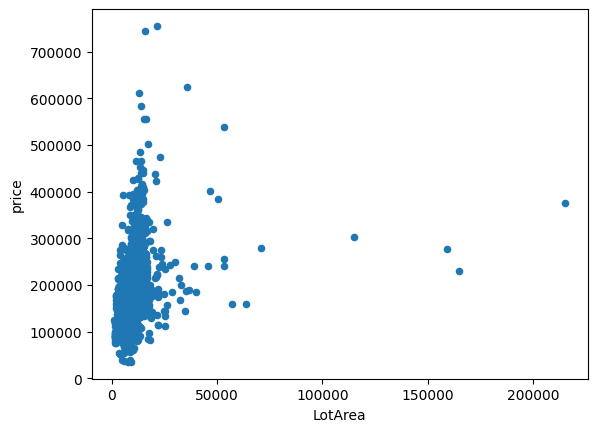

In [24]:
# datasetの'LotArea'と'price'を散布図で表示（DataFrameのplot()を利用する）
dataset.plot(kind='scatter', x='LotArea', y='price')

### 棒グラフ

大小や増減を比較する際に有効です。DataFrameの `plot.bar()` が使えます。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

In [25]:
#'price'のSaleConditionごとの平均を変数 price_by_condition に格納
price_by_condition = dataset.groupby('SaleCondition')['price'].mean()

<Axes: xlabel='SaleCondition'>

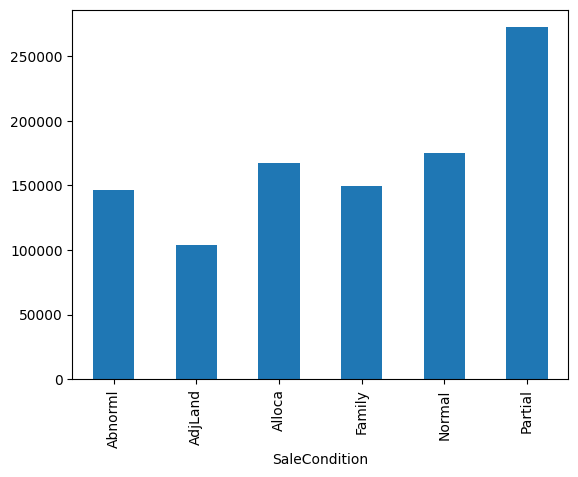

In [26]:
# price_by_conditionが持つ、棒グラフを表示する命令を実行
price_by_condition.plot.bar()

### 箱ヒゲ図 (Boxplot)

複数の変数の分布を比較する際に有効です（棒グラフでは平均の比較はできますが、分布全体の比較はできません)。

DataFrameの `boxplot()` が使えます。

参考：https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

<Axes: title={'center': 'price'}, xlabel='SaleCondition'>

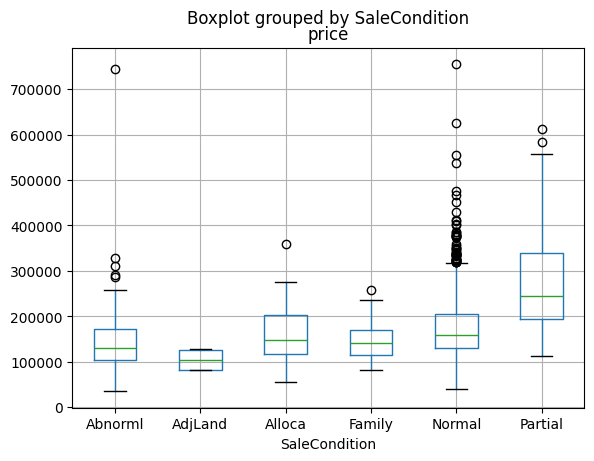

In [29]:
# datasetの'SaleCondition'ごとに'price'をDataFrameのboxplotで表示
dataset.boxplot(column='price', by ='SaleCondition')

## 6. 欠損値の確認

ある列が欠損値を持っているかどうかは Pandas の `isnull()` でわかります。特定の列の欠損値を知りたい場合は `pd.isnull(dataset['LotFrontage'])` のように記述します。また、`.sum()` をつなげることで、その列で欠損値を持つ行数がわかります。

参考：https://pandas.pydata.org/docs/reference/api/pandas.isnull.html

In [40]:
# すべての列がそれぞれ、欠損値が何行あるかを取得
dataset.isnull().sum()

Order             0
area              0
price             0
MSSubClass        0
MSZoning          0
                 ..
SaleType_ConLI    0
SaleType_ConLw    0
SaleType_New      0
SaleType_Oth      0
SaleType_WD       0
Length: 90, dtype: int64

In [34]:

missing = dataset.isnull().sum()
missing[missing > 0]


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [51]:
pd.isnull(dataset['LotFrontage'])


0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: LotFrontage, Length: 1460, dtype: bool

In [54]:
dataset[pd.isnull(dataset['LotFrontage'])]


Order  area   price  MSSubClass MSZoning  LotFrontage  LotArea Street  \
7         8  2090  200000          60       RL          NaN    10382   Pave   
12       13   912  144000          20       RL          NaN    12968   Pave   
14       15  1253  157000          20       RL          NaN    10920   Pave   
16       17  1004  149000          20       RL          NaN    11241   Pave   
24       25  1060  154000          20       RL          NaN     8246   Pave   
...     ...   ...     ...         ...      ...          ...      ...    ...   
1429   1430  1440  182900          20       RL          NaN    12546   Pave   
1431   1432   958  143750         120       RL          NaN     4928   Pave   
1441   1442   848  149300         120       RM          NaN     4426   Pave   
1443   1444   952  121000          30       RL          NaN     8854   Pave   
1446   1447  1188  157900          20       RL          NaN    26142   Pave   

     Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
7      NaN      IR1         Lvl    AllPub    Corner       Gtl       NWAmes   
12     NaN      IR2         Lvl    AllPub    Inside       Gtl       Sawyer   
14     NaN      IR1         Lvl    AllPub    Corner       Gtl        NAmes   
16     NaN      IR1         Lvl    AllPub   CulDSac       Gtl        NAmes   
24     NaN      IR1         Lvl    AllPub    Inside       Gtl       Sawyer   
...    ...      ...         ...       ...       ...       ...          ...   
1429   NaN      IR1         Lvl    AllPub    Corner       Gtl       NWAmes   
1431   NaN      IR1         Lvl    AllPub    Inside       Gtl      NPkVill   
1441   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1443   NaN      Reg         Lvl    AllPub    Inside       Gtl      BrkSide   
1446   NaN      IR1         Lvl    AllPub   CulDSac       Gtl      Mitchel   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
7          PosN       Norm     1Fam     2Story            7            6   
12         Norm       Norm     1Fam     1Story            5            6   
14         Norm       Norm     1Fam     1Story            6            5   
16         Norm       Norm     1Fam     1Story            6            7   
24         Norm       Norm     1Fam     1Story            5            8   
...         ...        ...      ...        ...          ...          ...   
1429       Norm       Norm     1Fam     1Story            6            7   
1431       Norm       Norm   TwnhsE     1Story            6            6   
1441       Norm       Norm   TwnhsE     1Story            6            5   
1443       Norm       Norm     1Fam     1.5Unf            6            6   
1446       Norm       Norm     1Fam     1Story            5            7   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
7          1973          1973     Gable  CompShg     HdBoard     HdBoard   
12         1962          1962       Hip  CompShg     HdBoard     Plywood   
14         1960          1960       Hip  CompShg     MetalSd     MetalSd   
16         1970          1970     Gable  CompShg     Wd Sdng     Wd Sdng   
24         1968          2001     Gable  CompShg     Plywood     Plywood   
...         ...           ...       ...      ...         ...         ...   
1429       1981          1981     Gable  CompShg     MetalSd     MetalSd   
1431       1976          1976     Gable  CompShg     Plywood     Plywood   
1441       2004          2004     Gable  CompShg     VinylSd     VinylSd   
1443       1916          1950     Gable  CompShg     Wd Sdng     Wd Sdng   
1446       1962          1962     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
7         Stone       240.0        TA        TA     CBlock       Gd       TA   
12          NaN         0.0        TA        TA     CBlock       TA       TA   
14      BrkFace       212.0        TA        TA     CB